In [1]:
import requests
import os
from dotenv import load_dotenv
from pprint import pprint
import pandas as pd

load_dotenv()
EIA_KEY = os.getenv('EIA_KEY')

In [2]:
url = 'https://api.eia.gov/series/'

params = {'api_key': EIA_KEY,
          'series_id': 'EBA.PSCO-ALL.D.H',
          'start': '2021'}

In [3]:
r = requests.get(url, params)
r

<Response [200]>

In [4]:
r.json()

{'request': {'command': 'series', 'series_id': 'EBA.PSCO-ALL.D.H'},
 'series': [{'series_id': 'EBA.PSCO-ALL.D.H',
   'name': 'Demand for Public Service Company of Colorado (PSCO), hourly - UTC time',
   'units': 'megawatthours',
   'f': 'H',
   'description': 'Timestamps follow the ISO8601 standard (https://en.wikipedia.org/wiki/ISO_8601). Hourly representations are provided in Universal Time.',
   'start': '20150701T07Z',
   'end': '20220303T23Z',
   'updated': '2022-03-03T18:46:47-0500',
   'data': [['20220303T23Z', 5478],
    ['20220303T22Z', 5348],
    ['20220303T21Z', 5266],
    ['20220303T20Z', 5207],
    ['20220303T19Z', 5204],
    ['20220303T18Z', 5289],
    ['20220303T17Z', 5335],
    ['20220303T16Z', 5410],
    ['20220303T15Z', 5561],
    ['20220303T14Z', 5495],
    ['20220303T13Z', 5150],
    ['20220303T12Z', 4834],
    ['20220303T11Z', 4639],
    ['20220303T10Z', 4607],
    ['20220303T09Z', 4634],
    ['20220303T08Z', 4718],
    ['20220303T07Z', 4846],
    ['20220303T06Z', 

In [5]:
for series in r.json()['series']:
    data=series['data']
    series_id=series['series_id']

<AxesSubplot:xlabel='timestamp'>

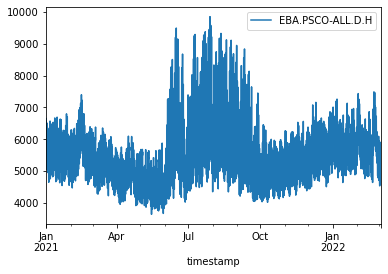

In [17]:
import pytz
mountain = pytz.timezone('US/Mountain')

df = (pd.DataFrame(data, columns=['timestamp', series_id])
        .assign(timestamp=lambda df_:pd.to_datetime(df_['timestamp']))
        .set_index('timestamp')
     )

df.index = df.index.tz_convert(mountain)

df.plot()

<AxesSubplot:xlabel='timestamp'>

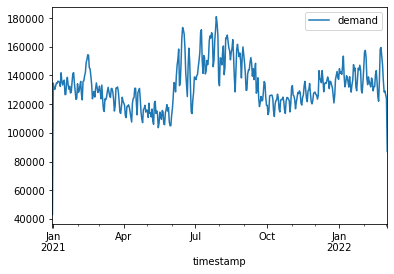

In [18]:
daily = df.resample('d').sum()
daily['demand'] = daily.sum(axis=1)
daily = daily[['demand']]
daily.plot()

<AxesSubplot:xlabel='timestamp'>

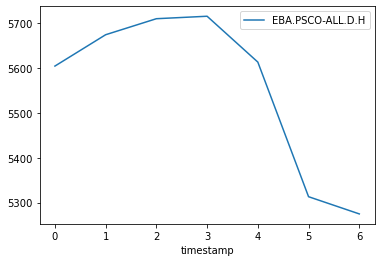

In [19]:
df.groupby(df.index.dayofweek).mean().plot()

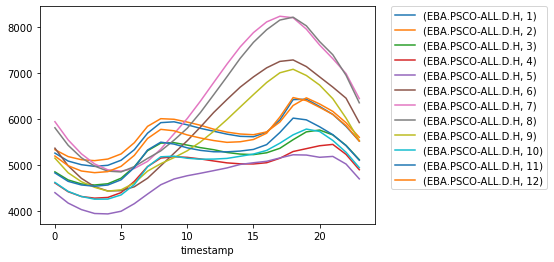

In [20]:
import matplotlib.pyplot as plt
df.groupby([df.index.hour, df.index.month]).mean().unstack().plot(legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)